In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size':16}) 

# Adding some Python

## Overview:


**Questions**
- Can we get onto the coding now please?
- How is this different from writing things in Spyder?

**Objectives**
- Write some Python code with accompanying markdown documentation.
- Make some nicely formatted plots

So far we've covered how to start a new notebook and how to add markdown to cells. Now we'll look at how to code in notebooks. In Semester 1 you will have covered the basics of Python using Spyder. Python in notebooks works the same way, with your code in code cells rather than on the command line.

## Information: 
In Semester 1 you came across Python **scripts**. Using notebooks doesn't mean you can't use scripts, and later on in the course we'll cover how to import your own scripts. One of the benefits of notebooks is that it makes it easier to see what's going on in your code and debug things, as it makes it very easy to break down your code into chunks. Once you have something that you know works well you can always convert it to a script later, with the added benefit of having all the helpful notes you made while you were developing the code!

## Importing Python Packages 

Python routines exist in packages. The first thing to do is to load the packages you need for your analysis using


In [4]:
import numpy

In the next cell we import the packages needed to plot a graph and fit a line to our data. You'll notice that some packages are loaded slightly differently, e.g.

In [5]:

import matplotlib.pyplot as plt


Here we're loading the `pyplot` sub-package of `matplotlib`. So we don't need to type `matplotlib.pyplot` every time we want to use it, we load it as `plt`.

You can call packages whatever you want when you load them with `import package as name`, but some packages have commonly used short names. It's good to get in the habit of using the common short names; it makes using examples from the internet much easier!

| Package name        | Short name |
|---------------------|-----------:|
| `numpy`             |       `np` |
| `matplotlib.pyplot` |      `plt` |
| `pandas`            |       `pd` |


## Information: Adding python to markdown cells

In the cell above you'll see that the names of Python packages like `pyplot` appear in a different font to the normal text. If you want to include some code in a markdown cell, put a single backtick \` either side of the code. Remember, this code won't be run, just displayed. 

If you want to include a larger block (for example, if you're writing an example or some pseudocode), start a new line and use three backticks to start and end your code block. If you want nice syntax highlighting, include `py` at the end of the first row of backticks to tell the notebook that it's Python code.

````
```py
import numpy as np
```
````

will render as 

```py
import numpy as np
```

The code cells in notebooks work exactly the same way as if you typed something on the command line in Spyder. It's up to you how you split your code up over the cells. It's a good idea to try to have each cell do just one thing, like defining a function, setting variables or plotting a graph. This way if you do get an error it's easier to spot where the problem may be. 

It's common practice to do any module importing at the top of your notebook. If you realise later on that you need to import a module that you hadn't thought of before, you can always go back and add it to the top cell. Just remember to rerun the cell. 


In [6]:
## In this cell I'm assigning some variables.
a = 1
b = 6
c = 789
d = np.arange(0,10,0.1) ## this is a useful command that we'll cover later

In [7]:
## in this cell I'm doing some maths
## I'm also printing the result here, so I can check that I'm getting what I expect.

result = a*b + c
print(result)

795


# Information: Jupyter magic
You may have seen at the top of this notebook there is a cell with some commands that don't look like normal Python commands:
```py
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
```

These are **magic** commands. The first sets the output resolution to be "retina" resolution (i.e. high res). 

The second is the most important one:
```py
%matplotlib inline
``` 
This sets up your notebook so that plots created with `matplotlib` appear "inline", i.e. they show up when you plot them. 

If you're going to be making plots it's always useful to put these lines right at the top of your notebook.


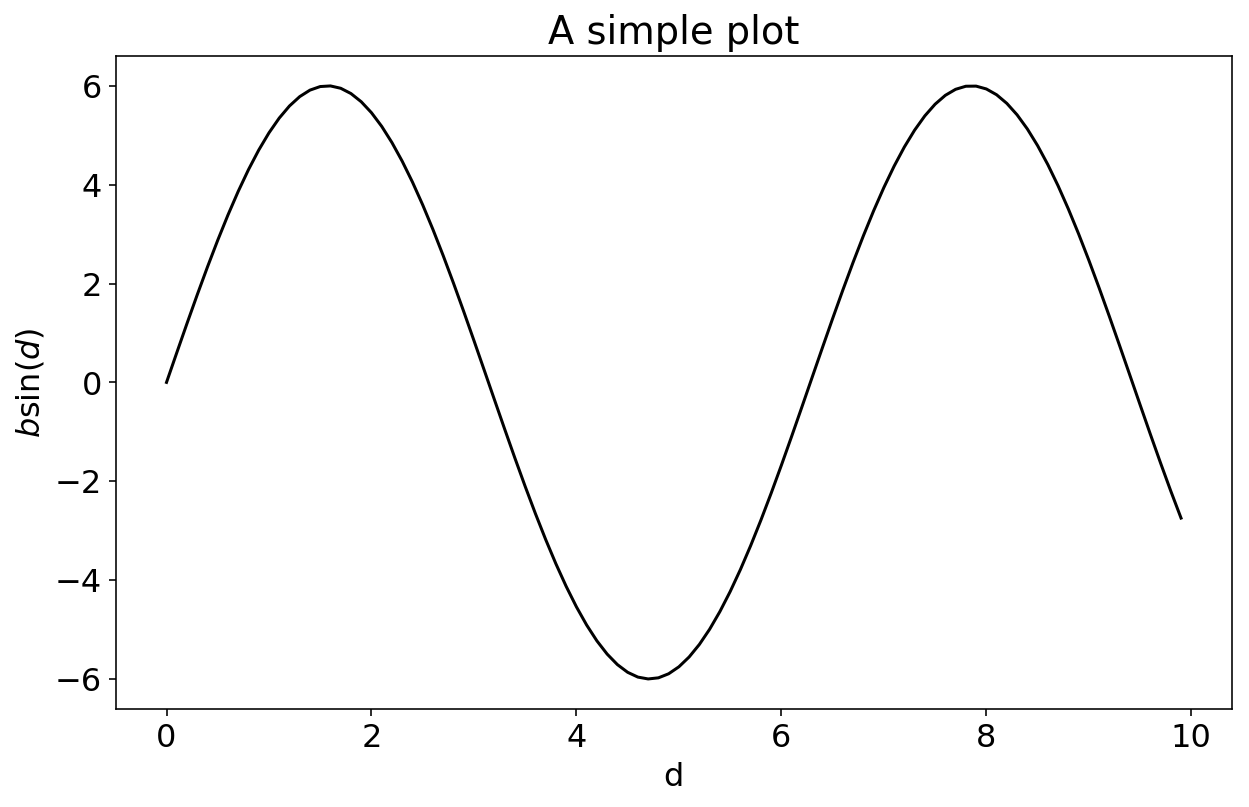

In [8]:
## Now I'm going to plot a graph.
## Keeping this separate from the other code cells so I don't have to rerun everything every time I want to change my plot

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(d, b*np.sin(d), 'k-')
ax.set_xlabel('d')
ax.set_ylabel('$b \sin(d)$')
ax.set_title('A simple plot')
plt.show()

The nice thing about using notebooks is that plots are stored in your notebook right alongside the code used to create them. You can still save them to a file in the usual way:


In [9]:
fig.savefig('simple_plot.png', dpi=300)

When you're saving figures you can also specify the resolution by setting the `dpi` variable in `savefig`. You shold save figures with a good resolution so that they show up clearly if you use them in something like a lab report later. 

If you want to change something in your plot, you don't have to re-write the whole code, you can just go back and edit and run the cell with the plotting code. You don't need to rerun the cells above unless you change something in those. 

## Read in some data and make a plot

Here we're going to repeat one of the exercises from the [C5 worksheet](https://moodle.bath.ac.uk/mod/folder/view.php?id=924491) you did in Semester 1. You will need the [data_2.dat](https://moodle.bath.ac.uk/pluginfile.php/1647503/mod_folder/content/0/data_2.dat?forcedownload=1) file you used in that exercise.

Previously you were asked to write a script that did all the steps. Here we're going to break the process down into separate cells.

If you haven't already, add `import` statements to the first code cell in your notebook to import `numpy` and `matplotlib.pyplot`. 

We can now read in the data file using `numpy.loadtxt`:



In [10]:
time, height, unc = np.loadtxt("../data/data_2.dat", skiprows=2, unpack=True, delimiter=",")

You will need to edit the path `"../data/data2_2.dat"` to point to where you have the file saved. 

As a reminder, `skiprows=2` tells `np.loadtxt` to ignore the first two rows of the file, `unpack=True` tells the function to unpack the rows into the `time`, `height` and `unc` variables, and `delimeter=","` tells it that the columns are separated by commas. 

The next thing we should do is check that the data has been read in as we expect. We can do that by printing the variables and checking the shape of each array.

In [11]:
print(time, time.shape)
print(height, height.shape)
print(unc, unc.shape)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ] (13,)
[182. 180. 178. 165. 160. 148. 136. 120.  99.  83.  55.  35.   5.] (13,)
[3.5  4.5  4.   5.5  2.5  3.   2.5  3.   4.   2.5  3.6  1.75 0.75] (13,)


We can see that each of the arrays has 13 elements and the numbers look right. It's always a good idea to check that files have been read in as you expect. If you're reading in a lot of data, you can always just print the start of an array rather than the whole thing. In the next cell we're just printing the first 5 elements of the arrays.


In [12]:
print(time[:5], time.shape)
print(height[:5], height.shape)
print(unc[:5], unc.shape)

[0.  0.5 1.  1.5 2. ] (13,)
[182. 180. 178. 165. 160.] (13,)
[3.5 4.5 4.  5.5 2.5] (13,)


The next thing we want to do is plot a graph so we can estimate the gravitational constant, $g$. 

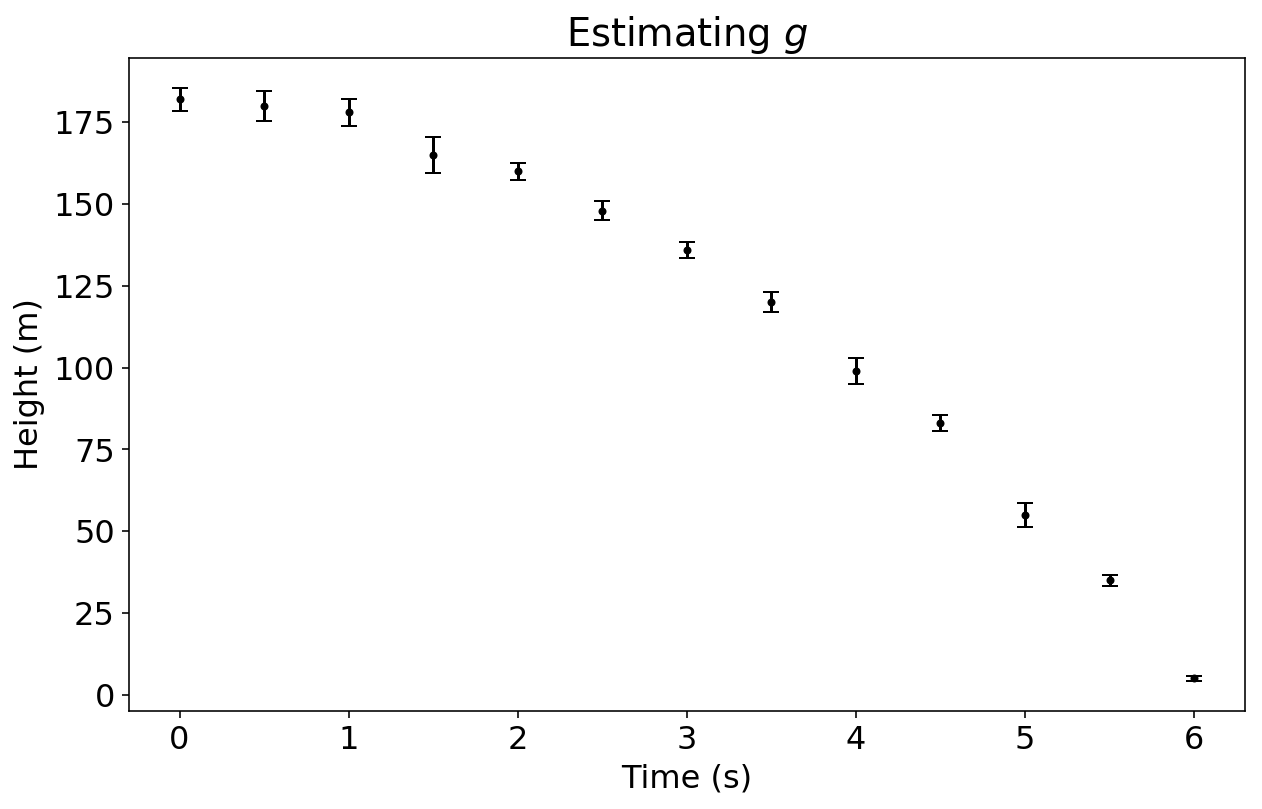

In [13]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(time, height, yerr=unc, marker='o', ms=3,c='k', ls='None', capsize=4)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Estimating $g$')
plt.show()

We have a nice plot, but how do we estimate $g$? This is where notebooks come in handy. Rather than work this out on a separate piece of paper, we can keep all our calculations in the notebook alongside our code.


### Estimating $g$

Starting from the SUVAT equations:

$$ s = u t + \dfrac{1}{2} a t^2 $$

where $s$ is displacement from the intial positoin, $u$ is the initial velocity, $a$ is accelleration and $t$ is time. 

In this case, the initial velocity, $u=0$ and, assuming that the only source of acceleration is gravity, $a=g$.

So we can now say

$$ s = \dfrac{1}{2} g t^2 $$

Now we can fit a function of this form to our data to get an estimate of $g$.

First we have to define a function to fit, then we can use `curve_fit` to fit this to our data. Aha! But to use curve fit, we need to import it, so we should add `from scipy.optimize import curve_fit` to our other import statements at the top of our notebook (and remember to rerun that cell).

In [14]:
# defining our function to fit to the data
def displacement(t, g):
    return 0.5 * g * t**2

In [15]:
# Now we can use curve_fit to fit this function to the data and get out a value and uncertainty for g

popt, pcov = curve_fit(displacement,time,height)
g = popt[0]
unc_g = np.sqrt(float(pcov[0][0]))

# and print the results to see what we get

print(g, unc_g)


5.6566628232682685 4.143635943721993


Hmmmmm. This looks weird. I was expecting $g$ to be negative... Let's plot it and see what's going on.

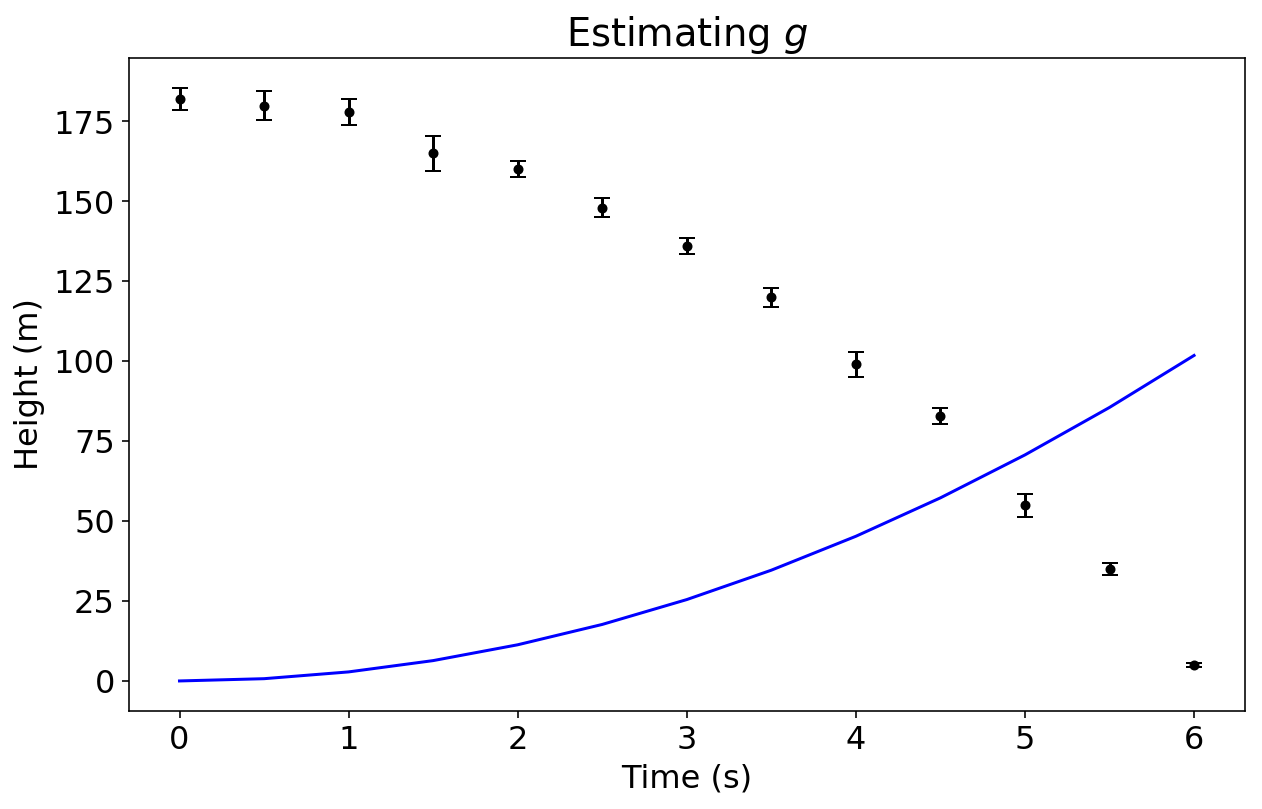

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(time, displacement(time, g), 'b-')
ax.errorbar(time, height, yerr=unc, marker='o', ms=4,c='k', ls='None', capsize=4)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Estimating $g$')
plt.show()

There's definately something going wrong here. 

Looking back at what we did earlier, we defined

$$ s = \dfrac{1}{2} g t^2 $$

But how does it know where the object started from? That must be the mistake, we need to tell the function that the object starts at some position $h_0$ and falls down to the ground. Let's define a new function:

or $$ h = h_0 + \dfrac{1}{2} g t^2 $$

where $h$ is the height and $h_0$ is the starting height of the object.

In [17]:
# defining our function to fit to the data
def position(t, g, h0):
    return h0 + 0.5 * g * t**2

In [18]:
# Now we can use curve_fit to fit this function to the data and get out a value and uncertainty for g

popt, pcov = curve_fit(position,time,height)
g = popt[0]
unc_g = np.sqrt(float(pcov[0][0]))

# and print the results to see what we get

print(g, unc_g)

# we should also check that it's made a sensible estimate for the starting height, h0

h0 = popt[1]
print(h0)


-9.74774902519182 0.11170512489487865
179.84650833076944


This is a much more sensible answer! But we should still check that the function looks like it fits the data.

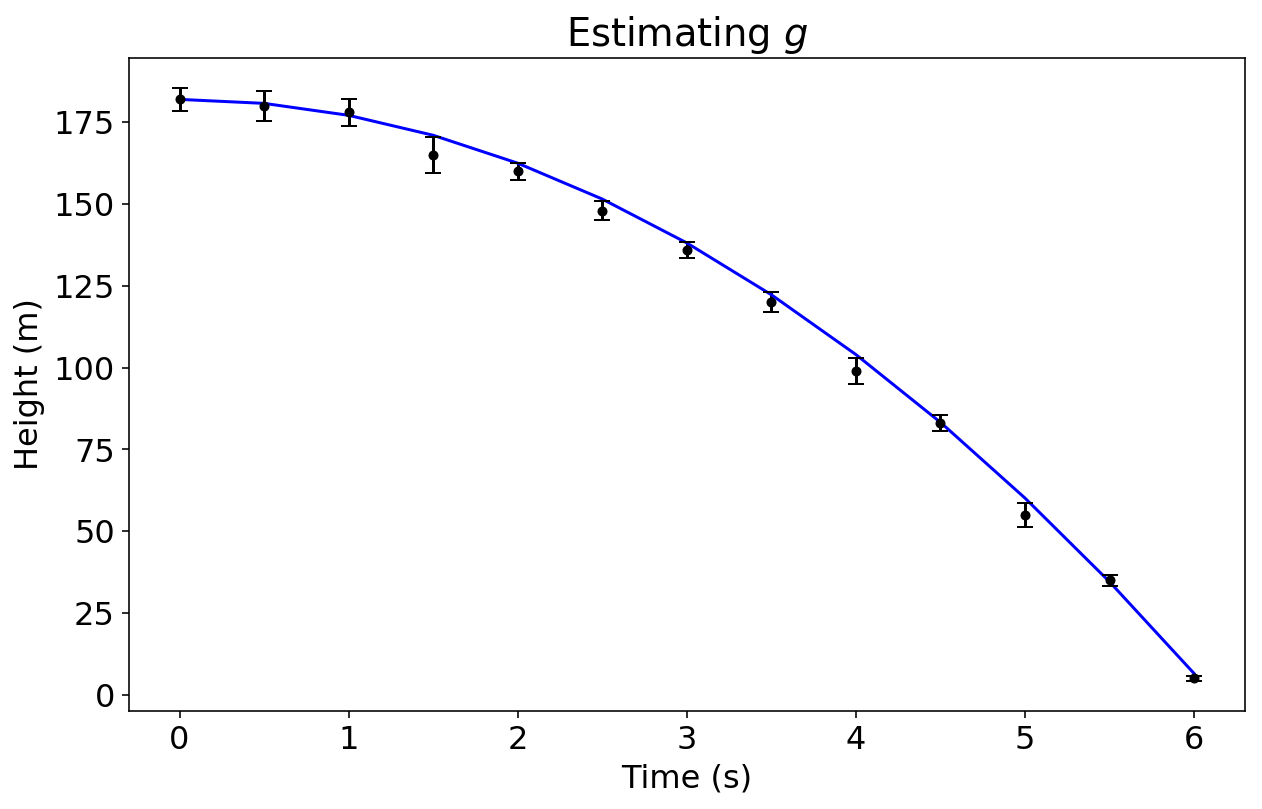

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(time, position(time, g, height[0]), 'b-')
ax.errorbar(time, height, yerr=unc, marker='o', ms=4,c='k', ls='None', capsize=4)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Estimating $g$')
plt.show()

Much better! I am now reassured that I can still do GCSE physics...

This is one of the benefits of using notebooks. I have all my notes for what I was trying to do alongside the code, so it didn't take too long to figure out what the problem is.

To make this plot actually useful we can add some extra information. We need a **legend** to show what the lines and sybols mean, and want to change the plot title to tell us the value we calculated for $g$.

To make a legend we have to first give the things we've plotted **labels**. In the cell below, I've added `label='Best Fit'` and `label='Data'` to the `plot` and `errorbar` commands that plotted the line and the data. We add the legend to the plot using `ax.legend`. 

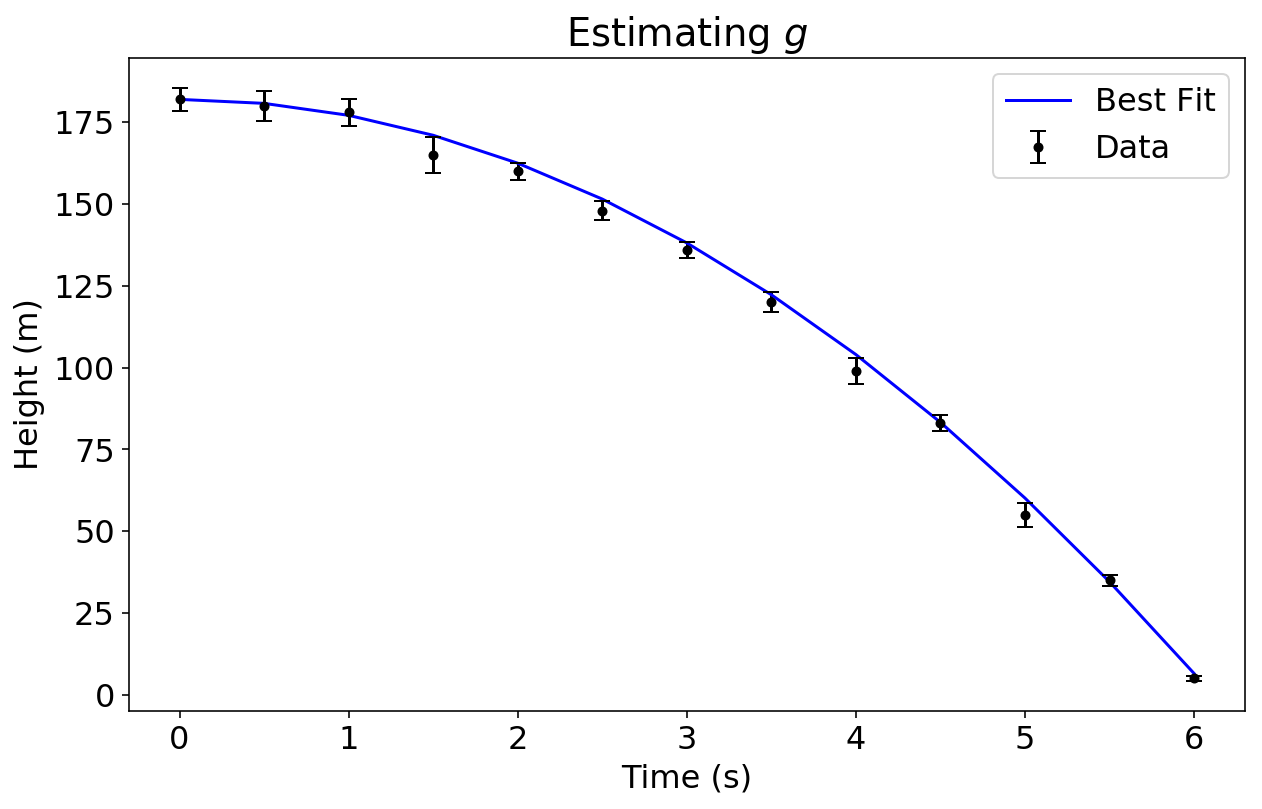

In [20]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
# plot and errorbar now have an extra parameter called 'label' 
ax.plot(time, position(time, g, height[0]), 'b-', label='Best Fit')
ax.errorbar(time, height, yerr=unc, marker='o', ms=4,c='k', ls='None', capsize=4, label='Data')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Estimating $g$')

## This is where we're adding the legend
ax.legend(loc='upper right')

plt.show()

To change the plot title to tell us the value of $g$ we have two options. We could hard-code the value into the `ax.set_title` call, e.g.
```py
ax.set_title('$g = -9.7477 m s^-2$')
```
But what if we re-ran the code and found a different value? We'd have to remember to update the title every time. The better option is to create a new string that takes our value for $g$ and inserts it into the title. 

First we create a new string that contains the variable `g` and formats it niceley. In the cell below we're using \$ to format the equation, and the parts in curly brackets define the fomatting of the numbers we want to print. `{0:.3f}` means take the first variable in the `.format` brackets and format it as a float with 3 decimal places. `{1:.3f}` does the same for the second variable (because remember Python starts counting from zero). To get the $m s^{-2}$ units formatted correctly we have to use an extra pair of curly brackets so Python knows that we're not searching for the -2'th element in the `format` brackets.


In [21]:
title_string = "$g = {0:.3f} \pm {1:.3f}$ m s$^{{-2}}$".format(g, unc_g)
print(title_string)

$g = -9.748 \pm 0.112$ m s$^{-2}$


Now we have our title string we can edit the code for the plot to have it display our new title. 

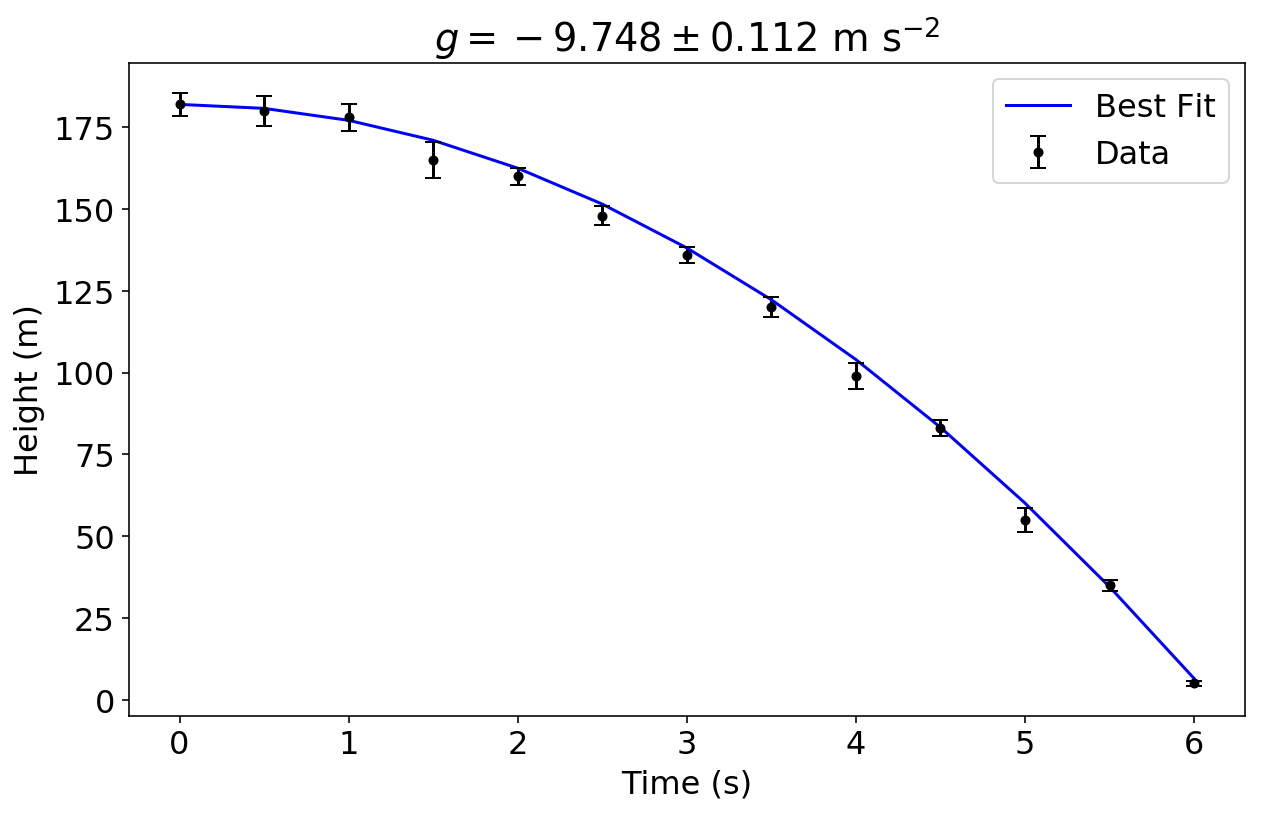

In [22]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(time, position(time, g, height[0]), 'b-', label='Best Fit')
ax.errorbar(time, height, yerr=unc, marker='o', ms=4,c='k', ls='None', capsize=4, label='Data')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
title_string = "$g = {0:.3f} \pm {1:.3f}$ m s$^{{-2}}$".format(g, unc_g)
ax.set_title(title_string)
ax.legend(loc='upper right')

plt.show()

One thing you may have noticed is that I now have 4 versions of the same plot. This is so you can see the steps of adding each of the different elements. While it can be useful to keep different plots at different stages, there's no need to make a new version of the plot each time. You can just go back to the cell and change whatever you want. 

## Exercise: Exercise 1

Download the [BoltData](../data/BoltData.csv) file. The data are time and distance measurements for Usain Bolt running 100~m. 

Have a look at the file to see what the columns are. Read in the data using `np.readtxt` and plot the data. Fit a straight line to the data to estimate Bolt's speed and the uncertainty on your measurement. Use markdown cells to write the details of what you're doing and why. 

Your final plot should be nicely formatted, with axes labels, units, a legend, and have your estimate of the speed and uncertainty (to a suitable level of decimal places) in the title. 

[solution](03_start_python-soln.ipynb)

## Solution+: Exercise 1

In this exercise we're using the data in [BoltData.csv](../data/BoltData.csv) to find out how fast Usain Bolt runs in 100 m. 

First we need to read in the data using `np.loadtxt`, and check that it's read in as expected.

In [23]:
dist, dist_unc, time, time_unc = np.loadtxt('../data/BoltData.csv', unpack=True, skiprows=1, delimiter=',')

In [24]:
print(dist, dist.shape)
print(dist_unc, dist_unc.shape)
print(time, time.shape)
print(time_unc, time_unc.shape)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.] (11,)
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02] (11,)
[0.         0.9234224  2.17814477 2.46189746 3.38705138 5.26387915
 6.04270515 7.93919241 8.22177923 8.57812847 9.56287374] (11,)
[1.0048096  0.63756914 0.38236597 0.91178482 0.19851041 1.15222207
 0.16182731 0.732011   1.26732922 0.59090761 1.02233664] (11,)


The next thing to do is to **plot the data**. Get in the habit of plotting your data frequently. It's much easier to see if it looks like you expect from a plot than by staring at numbers on a screen.

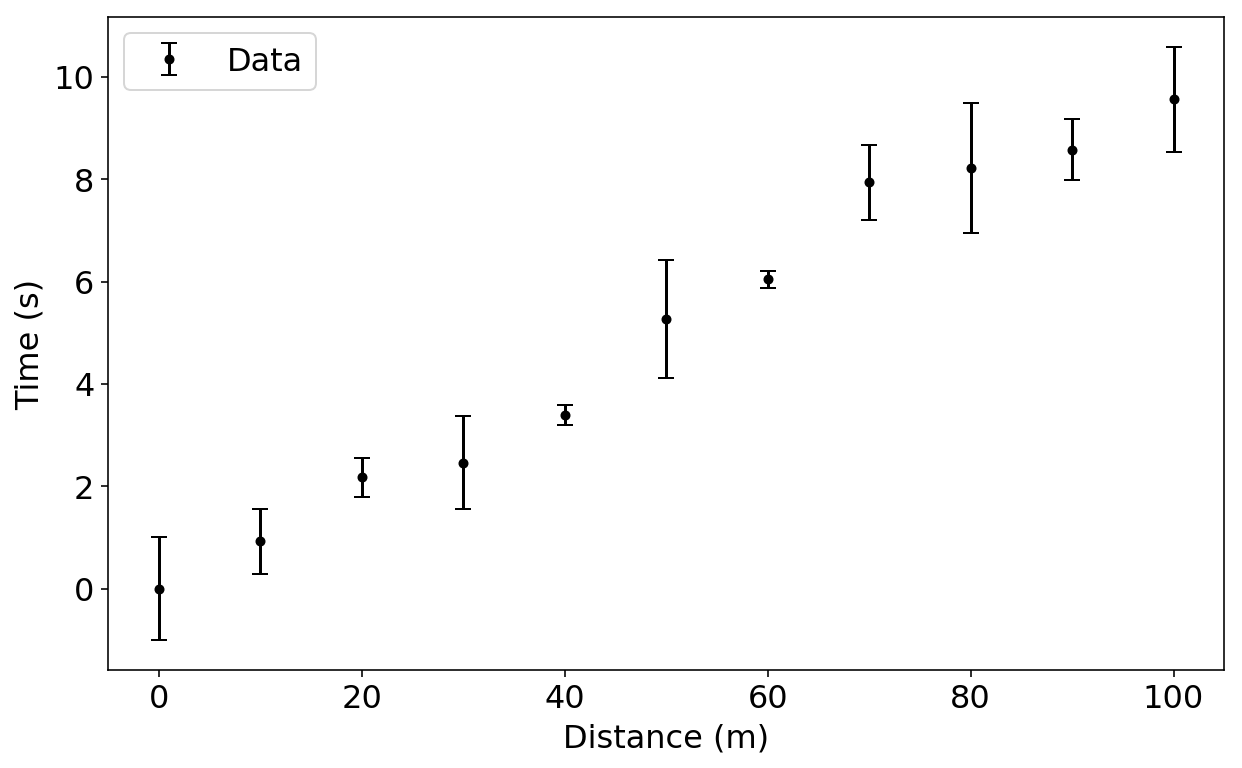

In [25]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(dist, time, yerr=time_unc, marker='o', ms=4,c='k', ls='None', capsize=4, label='Data')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Distance (m)')
ax.legend(loc='upper left')

plt.show()

## Measuring the speed

We want to measure the speed from the time and distance data:

$$v = \dfrac{d}{t}$$

We can do this by fitting a function of the form $y = m x + c$ to our data. 

$$ t = \dfrac{d}{v} + c$$


Why is there a constant, $c$, in this function if we know that $t = \dfrac{d}{v}$? We don't know how the data was taken, so it may be that the timer didn't start at the exact time Bolt started running, so $c$ takes this into account.

Now set up our function:

In [26]:
def time_run(d, v, c):
    return d / v + c

and now we can find the value of $v$ and it's associated uncertainty $\sigma_v$ (and $c$, $\sigma_c$) using `curve_fit`

In [27]:
popt, pcov = curve_fit(time_run, dist, time)
speed = popt[0]
speed_unc = pcov[0][0]

intercept = popt[1]
int_unc = pcov[1][1]
print(speed, speed_unc)

print(intercept, int_unc)

9.984175690191293 0.20643331413262758
-0.04800892191601898 0.07271120631997624


Now we can re-plot our data with our best fit line and have the speed printed out in the title. We can save the plot using `plt.savefig`


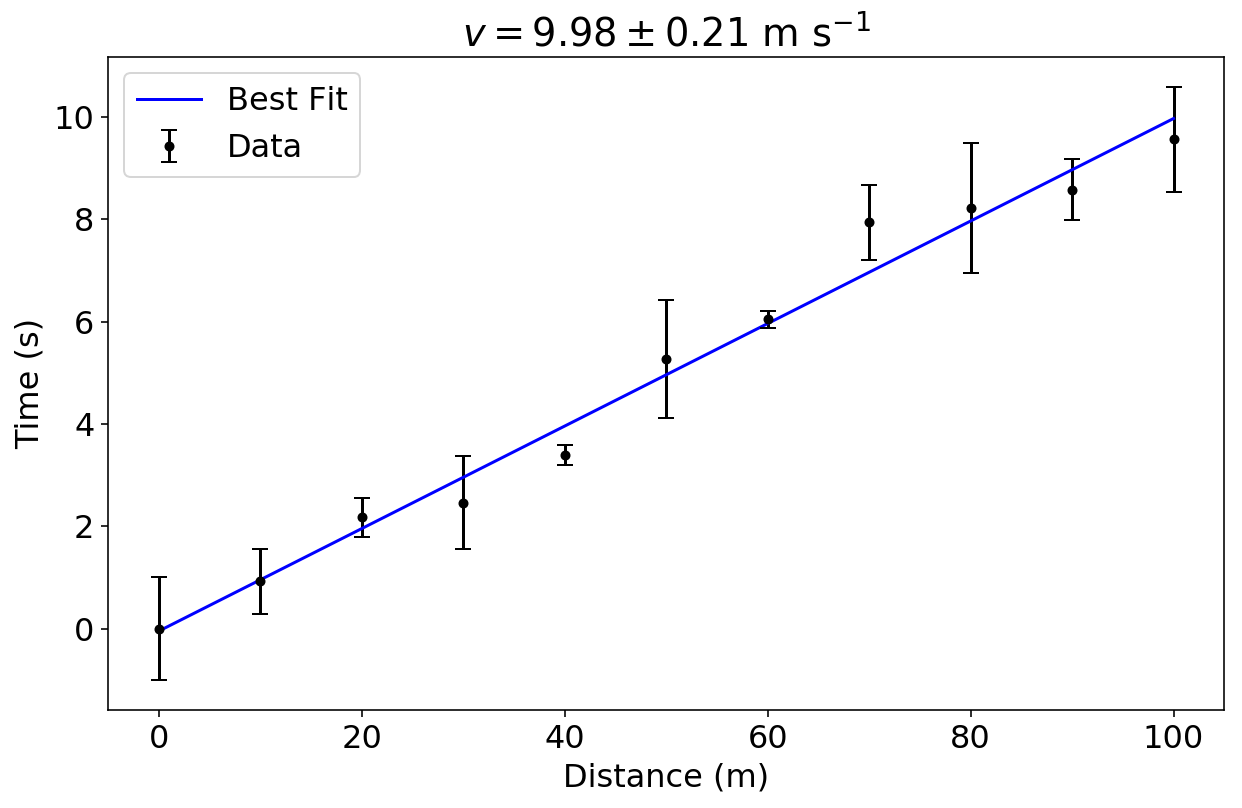

<Figure size 432x288 with 0 Axes>

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(dist, time_run(dist, speed, intercept), 'b-', label='Best Fit')
ax.errorbar(dist, time, yerr=time_unc, marker='o', ms=4,c='k', ls='None', capsize=4, label='Data')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Distance (m)')
title_string = "$v = {0:.2f} \pm {1:.2f}$ m s$^{{-1}}$".format(speed, speed_unc)
ax.set_title(title_string)
ax.legend(loc='upper left')

plt.show()
plt.savefig('Bolt_plot.png', dpi=300)

:solution+

## Key Points:
- I may have already mentioned this... but you should use the markdown cells to write what your code is doing and why.
- Use **magic commands** to get your plots to appear.
- You don't have to make a new cell with a new copy of your code every time you want to change something. You can just go back and edit the cell (super useful when you're making plots).
